In [186]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [131]:
#Function to generate i.i.d samples from a dataset


def bootstrap_samples(X, y, num_samples):
    """
    Generate bootstrap samples using sklearn's resample function.

    Parameters:
    - X: numpy array of shape (m, n), the data matrix.
    - y: numpy array of shape (m,), the output vector.
    - num_samples: int, number of bootstrap samples to generate.

    Returns:
    - X_samples: list of numpy arrays, each of shape (m, n).
    - y_samples: list of numpy arrays, each of shape (m,).
    """
    X_samples = []
    y_samples = []

    for _ in range(num_samples):
        X_star, y_star = resample(X, y, replace=True)  # Resampling with replacement
        X_samples.append(X_star)
        y_samples.append(y_star)

    return X_samples, y_samples

In [132]:
# Function to calculate the gradient

def grad(X, y, t, delta,lambda_):
    n = X.shape[1]
    w = w_from_t(t)
    n = X.shape[1]
    T = np.diag(t)
    Xt = X @ T
    
    Lt = (1/n)*((Xt.T @ Xt) + delta*(np.identity(n) - (T @ T) ))
    
    L_inv = np.linalg.inv(Lt)
    
    Bt = (L_inv @ (Xt.T @ y))*(1/n)
    
    a = (((X.T @ X) @ (t * Bt)) - X.T @ y)/n
    
    b = a - (delta/n)*(t * Bt)
    
    c = L_inv @ (t * a)
    
    d = ((X.T @ X - delta*np.identity(n)) @ (t * c))/n
    
    phi = 2*((Bt * (a - d)) - (b * c))
    
    grad = phi + lambda_ 
    
    grad = grad * (2*w) * np.exp(-w * w)
    
    return grad

In [151]:
# Calculating the objective function 

def objective_function(X, y, t, lambda_):
    n = X.shape[1]
    
    T = np.diag(t)
    Xt = X @ T
    
    Lt = (1/n)*((Xt.T @ Xt) + delta*(np.identity(n) - (T @ T) ))
    
    L_inv = np.linalg.inv(Lt)
    
    Bt = (L_inv @ (Xt.T @ y))*(1/n)
    
    return np.linalg.norm((y - Xt @ Bt)) + lambda_ * np.sum(t)

In [152]:
# Tranformation from t to  w and vice versa

def w_from_t(t):
    """
    Calculate vector w from vector t using the relationship t = 1 - exp(-w^2).
    """
    # Ensure all elements of t are within the valid range
    if np.any(t < 0) or np.any(t > 1):
        raise ValueError("All elements of t must be within the interval (0, 1]")
    
    # Calculate w from t
    w = np.sqrt(-np.log(1 - t))
    return w

def t_from_w(w):
    """
    Calculate vector t from vector w using the relationship t = 1 - exp(-w^2).
    """
    # Calculate t from w
    t = 1 - np.exp(-w**2)
    return t

In [194]:
# Generating data and initial values to the parameters

df = pd.read_csv("D2XL1_small dataset.csv")
X = df.values 
y = X[:, -1]
X = X[:, :-1]

t = np.full(X.shape[1],0.5) # initial value of t
delta = 1  # take 1
lambda_ = 1  # tuning paramter 
n_samples = 20 # no of i.i.d samples to be generated
max_iter = 1000 # iterations for gradient descent

alpha = 0.001 # step size for gradient descent

In [195]:
# Simulation experiment

obj = [] # to store objective function value in each iteration

for i in range(max_iter):
    X_samples, y_samples = bootstrap_samples(X, y, n_samples)
    grad_sum = 0
    for (Xi,yi) in zip(X_samples, y_samples):
        grad_sum += grad(Xi,yi,t,delta,lambda_)
    grad_average = grad_sum/n_samples
    t_new = t_from_w(w_from_t(t) - alpha * grad_average)
    t = t_new
    obj.append(objective_function(X, y, t, lambda_))
    

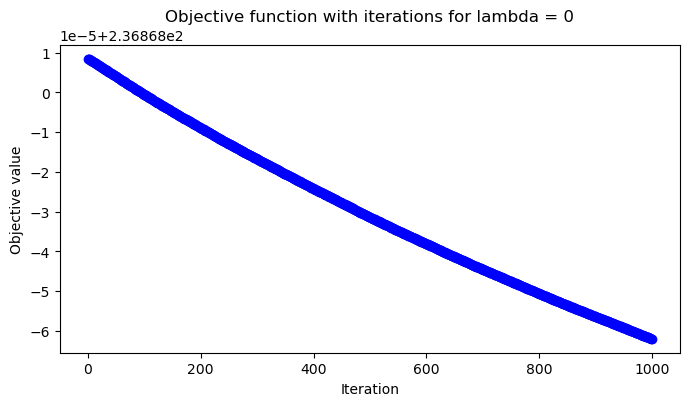

In [193]:
plt.figure(figsize=(8, 4))  # Set figure size
plt.plot(obj, marker='o', linestyle='-', color='b')  # Line plot with blue line and circle markers
plt.title('Objective function with iterations for lambda = 0')
plt.xlabel('Iteration')
plt.ylabel('Objective value')
plt.show()

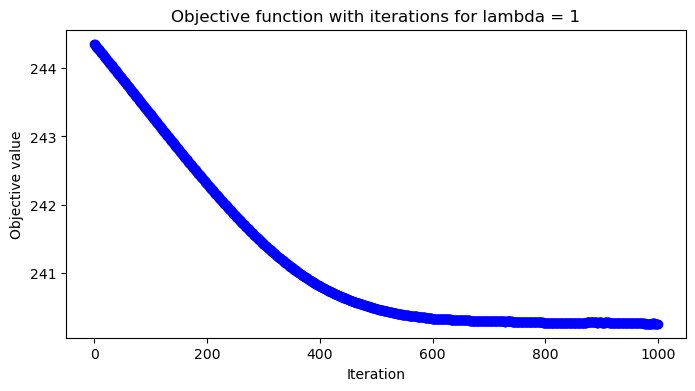

In [196]:
plt.figure(figsize=(8, 4))  # Set figure size
plt.plot(obj, marker='o', linestyle='-', color='b')  # Line plot with blue line and circle markers
plt.title('Objective function with iterations for lambda = 1')
plt.xlabel('Iteration')
plt.ylabel('Objective value')
plt.show()